            Date     Open     High      Low    Close  Change
4935  2016-01-04  120.295  120.466  118.706  119.316  -0.979
4936  2016-01-05  119.316  119.693  118.801  119.122  -0.194
4937  2016-01-06  119.123  119.165  118.253  118.473  -0.650
4938  2016-01-07  118.470  118.749  117.331  117.604  -0.866
4939  2016-01-08  117.602  118.829  117.453  117.491  -0.111
2016年の利益合計：9.675
2017年の利益合計：-3.139


(95, 125)

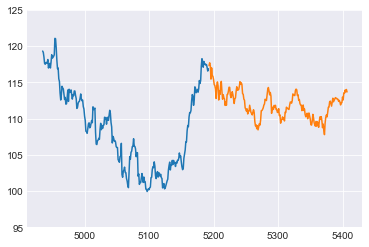

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 実行上問題ない注意は非表示にします

%matplotlib inline

# FXデータの読み込み
data = pd.read_csv("./USDJPY_1997_2017.csv")

# Close-Openをデータに追加します
data['Change'] = data.Close - data.Open

# 2016年のデータを取り出します
data16 = data.iloc[4935:5193,:] # pythonは0番目からindexが始まります
print(data16.head()) # データの概要を見てみます

# 2016年の合計を計算する
# 前々日終値に比べて前日終値が高い場合は、買い、低い場合は売りで入ります
sum_2016 = 0
for i in range(2,len(data16)): # len()で要素数を取得しています
  if data16.iloc[i-2,4] <= data16.iloc[i-1,4]:
    sum_2016 += data16.iloc[i,5] # index=5: 終値の差
  else:
    sum_2016 -= data16.iloc[i,5]

print("2016年の利益合計：%1.3lf" %sum_2016) # 2016年の利益合計

# 2016年のデータをプロットしてみます
plt.style.use('seaborn-darkgrid')
plt.plot(data16['Close'])
plt.ylim([95,125])

# 2017年のデータを取り出します
data17 = data.iloc[5193:,:]

# 2017年の合計を計算する
# 前々日終値に比べて前日終値が高い場合は、買い、低い場合は売りで入ります
sum_2017 = 0
for i in range(2,len(data17)): # len()で要素数を取得しています
    if data17.iloc[i-2,4] <= data17.iloc[i-1,4]:
        sum_2017 += data17.iloc[i,5]
    else:
        sum_2017 -= data17.iloc[i,5]

print("2017年の利益合計：%1.3lf" %sum_2017) # 2017年の利益合計

# 2017年からのデータをプロットしてみます
plt.plot(data17['Close'])
plt.ylim([95,125])